<a href="https://colab.research.google.com/github/Tanveer132/FST_mini-projects/blob/main/FST_Project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#State of India's Birds 2020
The State of India’s Birds report was created to assess the conservation status of the majority of species that regularly occur in the country. Worldwide, common and widespread species are declining; but in India, lack of information has meant that conservation attention has been focussed on only a few species (usually large, charismatic and threatened).

The report fills this gap by using over 10 million observations uploaded to the eBird platform by more than 15,500 birdwatchers to evaluate the distribution range size of 867 Indian birds, and their trends in abundance in both the long term (over 25+ years) and currently (past 5 years). Using these three measures, plus information from the IUCN Red List of global threat status, this report places Indian species into Low, Moderate and High categories of Conservation Concern for India. A large number of species that are thought to be common and widespread find themselves as of High Conservation Concern.

Migratory status (resident, local migrant or long-distance migrant) within the Indian Subcontinent 

1. Try out different classification algorithms

2. Filter out Best fitting model

3. Retrain and Evaluate Best fitted Model.

##Data importing and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_excel('/content/State of Indias Birds - Essentials.xlsx',index_col='Serial Number')
df.head()

,Common Name (India Checklist),Scientific Name (India Checklist),IUCN Status,WLPA Schedule,Analysed Long-term,Analysed Current,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)",Long Term Status,Current Status,Distribution Status,Status of Conservation Concern,Assessed Primarily Based On,Migratory Status
Serial Number,,,,,,,,,,,,,,,,,,
1,Fulvous Whistling Duck,Dendrocygna bicolor,Least Concern,Schedule-I,NaN,X,NaN,NaN,-1.873458,11.421401,13.407499,0.0711,Data Deficient,Uncertain,Moderate,Low,Trends & Range Size,Resident
2,Lesser Whistling Duck,Dendrocygna javanica,Least Concern,Schedule-IV,X,X,4.607645,19.496768,-3.907999,2.727740,149.898761,0.0987,Stable,Moderate Decline,Very Large,Low,Trends & Range Size,Resident
3,Bar-headed Goose,Anser indicus,Least Concern,Schedule-IV,X,X,-13.399940,217.658129,-6.935407,38.946950,45.447258,0.0700,Uncertain,Uncertain,Large,Low,Trends & Range Size,Migratory-Local
4,Greylag Goose,Anser anser,Least Concern,Schedule-IV,X,X,-38.402762,34.943843,-3.091665,8.853505,24.569174,0.1045,Uncertain,Uncertain,Moderate,Low,Trends & Range Size,Migratory-Long-Distance
5,Comb Duck,Sarkidiornis melanotos,Least Concern,Schedule-IV,X,X,1.291713,31.154296,-6.018774,4.432597,81.233442,0.0836,Uncertain,Moderate Decline,Large,Moderate,Trends & Range Size,Resident


In [3]:
df.shape

(867, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 1 to 867
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Common Name (India Checklist)                         867 non-null    object 
 1   Scientific Name (India Checklist)                     867 non-null    object 
 2   IUCN Status                                           867 non-null    object 
 3   WLPA Schedule                                         867 non-null    object 
 4   Analysed Long-term                                    485 non-null    object 
 5   Analysed Current                                      675 non-null    object 
 6   Long-term Trend (%)                                   487 non-null    float64
 7   Long-term Trend CI (%)                                487 non-null    float64
 8   Current Annual Change (%)                             677 no

In [5]:
df.describe()

,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)"
count,487.000000,487.000000,677.000000,677.000000,856.000000,856.000000
mean,-23.771736,35.660908,-1.508480,14.041841,35.951108,0.075573
std,40.640144,35.405406,10.239282,21.119122,50.519018,0.035236
min,-97.040887,0.914415,-24.033897,1.185877,0.000900,0.000000
25%,-53.361035,15.724150,-5.989720,4.787951,5.653592,0.059075
50%,-30.045127,26.164983,-2.535760,8.648848,13.659506,0.074500
75%,-1.467697,42.704433,1.640885,16.217987,37.720139,0.090525
max,171.255544,368.877213,191.156998,400.802847,224.354113,0.441700


In [6]:
df.isna().sum()

Common Name (India Checklist)                             0
Scientific Name (India Checklist)                         0
IUCN Status                                               0
WLPA Schedule                                             0
Analysed Long-term                                      382
Analysed Current                                        192
Long-term Trend (%)                                     380
Long-term Trend CI (%)                                  380
Current Annual Change (%)                               190
Current Annual Change CI (%)                            190
Distribution Range Size (units of 10,000 sq. km.)        11
Distribution Range Size CI (units of 10,000 sq. km.)     11
Long Term Status                                          5
Current Status                                            5
Distribution Status                                       5
Status of Conservation Concern                            5
Assessed Primarily Based On             

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


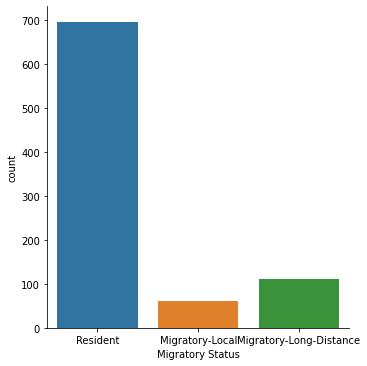

In [7]:
sns.catplot(df['Migratory Status'],kind='count',data=df)

In [8]:
df.columns

Index(['Common Name (India Checklist)', 'Scientific Name (India Checklist)',
       'IUCN Status', 'WLPA Schedule', 'Analysed Long-term',
       'Analysed Current', 'Long-term Trend (%)', 'Long-term Trend CI (%)',
       'Current Annual Change (%)', 'Current Annual Change CI (%)',
       'Distribution Range Size (units of 10,000 sq. km.)',
       'Distribution Range Size CI (units of 10,000 sq. km.)',
       'Long Term Status', 'Current Status', 'Distribution Status',
       'Status of Conservation Concern', 'Assessed Primarily Based On',
       'Migratory Status'],
      dtype='object')

In [9]:
#fillna using mode
#same value X in whole column will not show any effect on labels
df=df.drop(columns=['Analysed Current','Analysed Long-term'])

df['Long-term Trend (%)']=df['Long-term Trend (%)'].fillna(df['Long-term Trend (%)'].median())
df['Long-term Trend CI (%)']=df['Long-term Trend CI (%)'].fillna(df['Long-term Trend CI (%)'].median())
df['Current Annual Change (%)']=df['Current Annual Change (%)'].fillna(df['Current Annual Change (%)'].median())
df['Current Annual Change CI (%)']=df['Current Annual Change CI (%)'].fillna(df['Current Annual Change CI (%)'].median())
df['Distribution Range Size (units of 10,000 sq. km.)']=df['Distribution Range Size (units of 10,000 sq. km.)'].fillna(df['Distribution Range Size (units of 10,000 sq. km.)'].median())
df['Distribution Range Size CI (units of 10,000 sq. km.)']=df['Distribution Range Size CI (units of 10,000 sq. km.)'].fillna(df['Distribution Range Size CI (units of 10,000 sq. km.)'].median())

df['Long Term Status']=df['Long Term Status'].fillna(df['Long Term Status'].mode())
df['Current Status']=df['Current Status'].fillna(df['Current Status'].mode())
df['Distribution Status']=df['Distribution Status'].fillna(df['Distribution Status'].mode())
df['Status of Conservation Concern']=df['Status of Conservation Concern'].fillna(df['Status of Conservation Concern'].mode())
df['Assessed Primarily Based On']=df['Assessed Primarily Based On'].fillna(df['Assessed Primarily Based On'].mode())


df.isna().sum()

Common Name (India Checklist)                           0
Scientific Name (India Checklist)                       0
IUCN Status                                             0
WLPA Schedule                                           0
Long-term Trend (%)                                     0
Long-term Trend CI (%)                                  0
Current Annual Change (%)                               0
Current Annual Change CI (%)                            0
Distribution Range Size (units of 10,000 sq. km.)       0
Distribution Range Size CI (units of 10,000 sq. km.)    0
Long Term Status                                        5
Current Status                                          5
Distribution Status                                     5
Status of Conservation Concern                          5
Assessed Primarily Based On                             1
Migratory Status                                        0
dtype: int64

In [10]:
df=df.dropna()
df.isna().sum()

Common Name (India Checklist)                           0
Scientific Name (India Checklist)                       0
IUCN Status                                             0
WLPA Schedule                                           0
Long-term Trend (%)                                     0
Long-term Trend CI (%)                                  0
Current Annual Change (%)                               0
Current Annual Change CI (%)                            0
Distribution Range Size (units of 10,000 sq. km.)       0
Distribution Range Size CI (units of 10,000 sq. km.)    0
Long Term Status                                        0
Current Status                                          0
Distribution Status                                     0
Status of Conservation Concern                          0
Assessed Primarily Based On                             0
Migratory Status                                        0
dtype: int64

In [11]:
df.shape

(862, 16)

In [12]:
#encoding categorised columns
le=LabelEncoder()

df['IUCN Status']=le.fit_transform(df['IUCN Status'])
df['WLPA Schedule']=le.fit_transform(df['WLPA Schedule'])
df['Long Term Status']=le.fit_transform(df['Long Term Status'])
df['Long Term Status']=le.fit_transform(df['Long Term Status'])
df['Current Status']=le.fit_transform(df['Current Status'])
df['Distribution Status']=le.fit_transform(df['Distribution Status'])
df['Status of Conservation Concern']=le.fit_transform(df['Status of Conservation Concern'])
df['Assessed Primarily Based On']=le.fit_transform(df['Assessed Primarily Based On'])
df['Migratory Status']=le.fit_transform(df['Migratory Status'])


In [13]:

df.head()

,Common Name (India Checklist),Scientific Name (India Checklist),IUCN Status,WLPA Schedule,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)",Long Term Status,Current Status,Distribution Status,Status of Conservation Concern,Assessed Primarily Based On,Migratory Status
Serial Number,,,,,,,,,,,,,,,,
1,Fulvous Whistling Duck,Dendrocygna bicolor,2,0,-30.045127,26.164983,-1.873458,11.421401,13.407499,0.0711,0,6,2,1,4,2
2,Lesser Whistling Duck,Dendrocygna javanica,2,1,4.607645,19.496768,-3.907999,2.727740,149.898761,0.0987,3,1,4,1,4,2
3,Bar-headed Goose,Anser indicus,2,1,-13.399940,217.658129,-6.935407,38.946950,45.447258,0.0700,6,6,1,1,4,0
4,Greylag Goose,Anser anser,2,1,-38.402762,34.943843,-3.091665,8.853505,24.569174,0.1045,6,6,2,1,4,1
5,Comb Duck,Sarkidiornis melanotos,2,1,1.291713,31.154296,-6.018774,4.432597,81.233442,0.0836,6,1,1,2,4,2


**Conclusion :** Now data is well cleaned.

In [14]:
df=df.iloc[:,2:]
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

##Different Classification Algorithms

In [16]:
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [17]:
#models to be used
models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "Naive Bays":GaussianNB(),
        "KNN":KNeighborsClassifier(),
        "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        "XGBClassifier":XGBClassifier()}


###Create functions

In [18]:
#models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
  #split data
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
  acc_result={}
  for name,model in models.items():
    #create pipeline
    if scaleFlag==0: 
      pipeline=Pipeline([("MinMaxScalar",MinMaxScaler()),
                       ("model",model)])
    elif scaleFlag==1:
      pipeline=Pipeline([("StandardScalar",StandardScaler()),
                       ("model",model)])
    elif scaleFlag==2:
      pipeline=Pipeline([("model",model)])

#Fitting model
    model_fit=pipeline.fit(xtrain,ytrain)
    ypred=model_fit.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    print("The accuracy for ",name, " is ",acc)
    acc_result[name]=acc

  return acc_result


In [19]:
def best_model(result):
  high=0
  for name,acc in result.items():
    if high<acc:
      high=acc
      model_name=name
  print('Best model is ',model_name," with accuracy : ",high)

In [20]:
def bestParam(model,param,xtrain,ytrain):
  #cv
  cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
  gridcv=GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=cv)
  res=gridcv.fit(xtrain,ytrain)
  
  print("Best parameters are :",res.best_params_)
  print("Best accuracy is : ",res.best_score_)

###Call functions and get best fitting model

In [21]:
acc=modelAccuracy(models,x,y,2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The accuracy for  LogisticRegression  is  0.791907514450867
The accuracy for  DecisionTreeClassifier  is  0.6647398843930635
The accuracy for  SVM  is  0.791907514450867
The accuracy for  Naive Bays  is  0.3063583815028902
The accuracy for  KNN  is  0.791907514450867
The accuracy for  RandomForestClassifier  is  0.8208092485549133
The accuracy for  AdaBoostClassifier  is  0.7803468208092486
The accuracy for  GradientBoostingClassifier  is  0.7976878612716763
The accuracy for  XGBClassifier  is  0.8092485549132948


In [22]:
best_model(acc)

Best model is  RandomForestClassifier  with accuracy :  0.8208092485549133


**Conclusion :** Best model is  RandomForestClassifier  with accuracy :  0.8208092485549133


In [23]:
# model=RandomForestClassifier()
# params={"n_estimators":[10,50,100,500],
#         "criterion":["gini", "entropy"],
#         "max_depth":[3,5,7,8,9,10]}
# bestParam(model,params,xtrain,ytrain)

###Retrain the best fitted model using best parameters

In [24]:
model=RandomForestClassifier(criterion='entropy', max_depth= 9, n_estimators= 500)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

0.8092485549132948
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.75      0.12      0.21        24
           2       0.81      1.00      0.90       137

    accuracy                           0.81       173
   macro avg       0.52      0.38      0.37       173
weighted avg       0.75      0.81      0.74       173



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


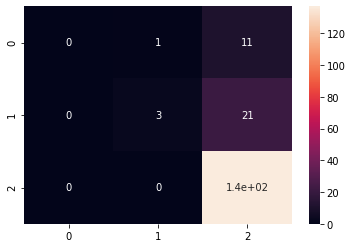

In [25]:
# Final Evaluation
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


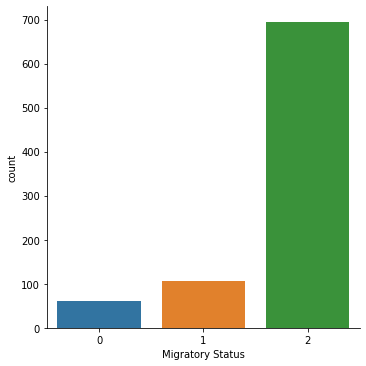

In [26]:
sns.catplot(df['Migratory Status'],kind='count',data=df)

In [30]:
#Applying oversampling
#0-local, 1- long, 2-resident
long_mig=df[df['Migratory Status']==1].index
resident=df[df['Migratory Status']==2].index
local=df[df['Migratory Status']==0].index

#get random index from long_mig equal to mejority resident
random_index1=np.array(np.random.choice(long_mig,size=len(resident),replace=True))

# #get random index from local equal to mejority resident
random_index2=np.array(np.random.choice(local,size=len(resident),replace=True))
oversample_index=np.concatenate([local,random_index1,random_index2])

oversample=df.iloc[oversample_index,:]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


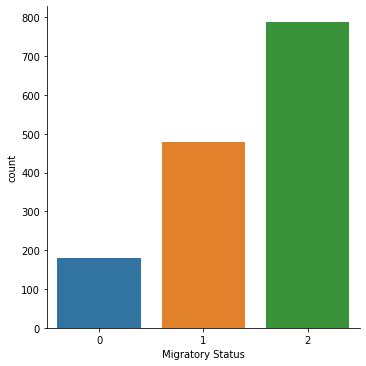

In [31]:
sns.catplot(oversample['Migratory Status'],kind='count',data=df)

In [32]:
oversample.shape

(1450, 14)

In [37]:
x=oversample.iloc[:,:-1]
y=oversample.iloc[:,-1]

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
model=RandomForestClassifier(criterion='entropy', max_depth= 9, n_estimators= 500)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       163

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290



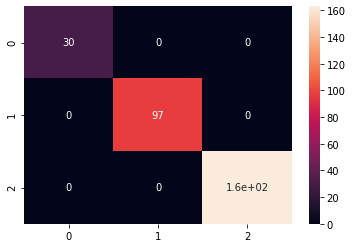

In [40]:
# Final Evaluation
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

**Conclusion :** After oversampling and balancing the data, we get best accuracy.